# AlexNet results for Image Classification on CIFAR-10

In [1]:
import random
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
def get_val_acc(file_name):
    with open(file_name) as fin:
        val_acc = []
        for line in fin.readlines():
            line = [i.strip() for i in line.strip().split(' ')]
            if len(line) == 5:
                acc = line[-1].strip().split('=')
                val_acc.append(acc[-1])
    return val_acc

### Optimize by SGD without step decay, validation accuracy versus different learning rate

lr = 1e-4, max Validation-accuracy = 0.785900
lr = 5e-5, max Validation-accuracy = 0.750700
lr = 1e-5, max Validation-accuracy = 0.667000


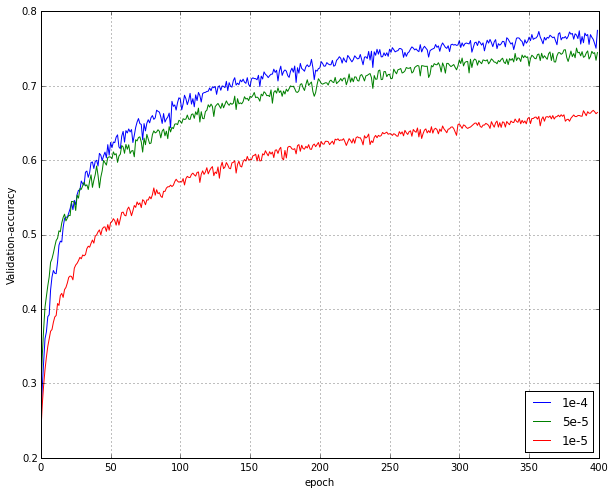

In [3]:
val_acc_sgd = []
lr_list = ['1e-4',
           '5e-5',
           '1e-5']

for lr in lr_list:
    file_name = './model/sgd/%s/log' % (lr)
    val_acc = get_val_acc(file_name)
    val_acc_sgd.append(val_acc)
    plt.plot(val_acc[:400])
    print 'lr = %s, max Validation-accuracy = %s' % (lr, max(val_acc))

plt.legend(lr_list, loc=4)
plt.xlabel('epoch')
plt.ylabel('Validation-accuracy')
plt.grid('on')
plt.show()

epoch = len(val_acc_sgd[0])

### SGD with various momentum and learning rate = 1e-4, learning rate step decay = 0.99 

lr = 1e-4 with momentum 0.5, max Validation-accuracy = 0.719300
lr = 1e-4 with momentum 0.9, max Validation-accuracy = 0.752000
lr = 1e-4 with momentum 0.95, max Validation-accuracy = 0.769500
lr = 1e-4 with momentum 0.99, max Validation-accuracy = 0.797900
lr = 1e-4 with momentum 0.999, max Validation-accuracy = 0.710900


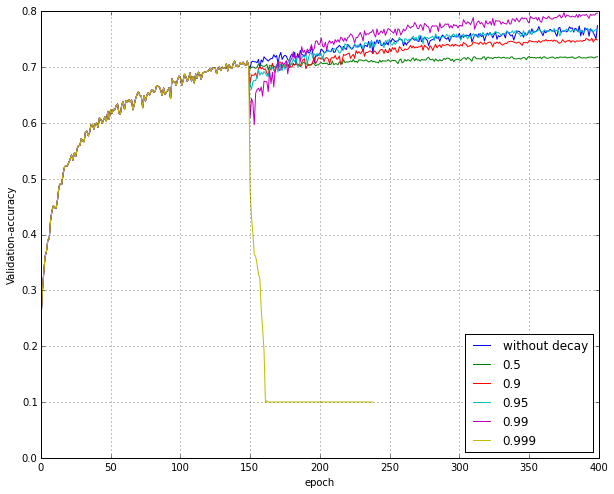

In [4]:
plt.plot(val_acc_sgd[0][:400])
val_acc_decay = []
momentum_list = ['0.5',
                 '0.9',
                 '0.95',
                 '0.99',
                 '0.999']

for momentum in momentum_list:
    file_name = './model/momentum/%s/log' % (momentum)
    val_acc = val_acc_sgd[0][:150] + get_val_acc(file_name)
    val_acc_decay.append(val_acc)
    plt.plot(val_acc[:400])
    print 'lr = 1e-4 with momentum %s, max Validation-accuracy = %s' % (momentum, max(val_acc[:400]))

plt.legend(['without decay'] + momentum_list, loc=4)
plt.xlabel('epoch')
plt.ylabel('Validation-accuracy')
plt.grid('on')
plt.show()

lr = 1e-4, max Validation-accuracy = 0.785900
lr = 1e-4 with momentum 0.99, max Validation-accuracy = 0.804800


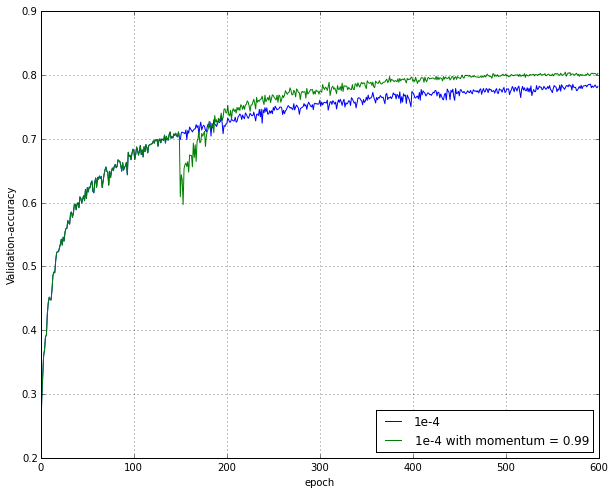

In [5]:
plt.plot(val_acc_sgd[0])
print 'lr = 1e-4, max Validation-accuracy = %s' % max(val_acc_sgd[0])
plt.plot(val_acc_decay[3])
print 'lr = 1e-4 with momentum 0.99, max Validation-accuracy = %s' % max(val_acc_decay[3])

plt.legend(['1e-4', '1e-4 with momentum = 0.99'], loc=4)
plt.xlabel('epoch')
plt.ylabel('Validation-accuracy')
plt.grid('on')
plt.show()

### Optimize by RMSProp with different learning rate and gamma1 = 0.95

lr = 1e-4, max Validation-accuracy = 0.773300
lr = 5e-5, max Validation-accuracy = 0.796700
lr = 1e-5, max Validation-accuracy = 0.798000
lr = 1e-6, max Validation-accuracy = 0.712500


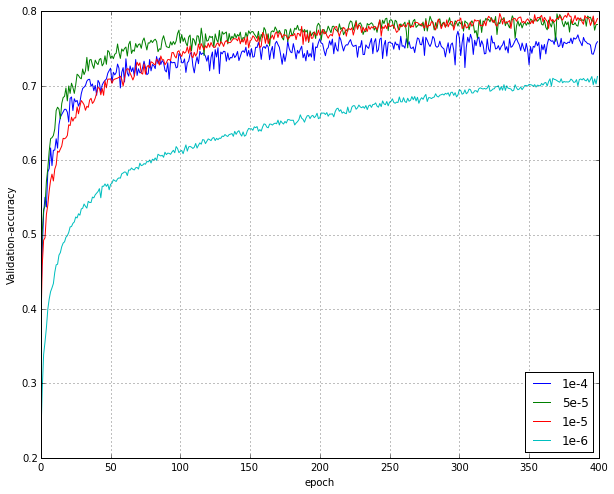

In [6]:
val_acc_rmsprop = []
lr_list = ['1e-4',
           '5e-5',
           '1e-5', 
           '1e-6']

for lr in lr_list:
    file_name = './model/rmsprop/%s/log' % (lr)
    val_acc = get_val_acc(file_name)
    val_acc_rmsprop.append(val_acc)
    plt.plot(val_acc[:400])
    print 'lr = %s, max Validation-accuracy = %s' % (lr, max(val_acc[:400]))
    
plt.legend(lr_list, loc=4)
plt.xlabel('epoch')
plt.ylabel('Validation-accuracy')
plt.grid('on')
plt.show()

### Optimize by RMSProp with different decay_rate and learning rate = 1e-5

gamma1 = 0.9, max Validation-accuracy = 0.804400
gamma1 = 0.95, max Validation-accuracy = 0.809900
gamma1 = 0.99, max Validation-accuracy = 0.804000
gamma1 = 0.999, max Validation-accuracy = 0.804300


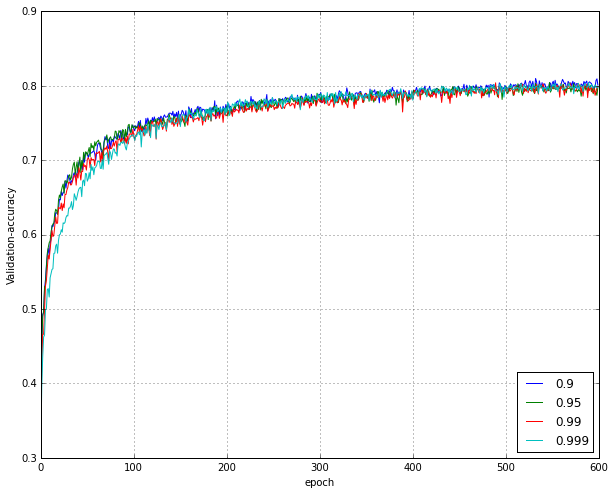

In [7]:
plt.plot(val_acc_rmsprop[2])
val_acc_rmsprop_gamma1 = []
lr_list = ['0.9',
           '0.95',
           '0.99',
           '0.999']

for lr in lr_list:
    if lr == '0.95':
        print 'gamma1 = %s, max Validation-accuracy = %s' % (0.95, max(val_acc_rmsprop[2]))
        continue
    file_name = './model/rmsprop/1e-5-%s/log' % (lr)
    val_acc = get_val_acc(file_name)
    val_acc_rmsprop_gamma1.append(val_acc)
    plt.plot(val_acc)
    print 'gamma1 = %s, max Validation-accuracy = %s' % (lr, max(val_acc))
    
plt.legend(lr_list, loc=4)
plt.xlabel('epoch')
plt.ylabel('Validation-accuracy')
plt.grid('on')
plt.show()